In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('bestsellers.csv')
df

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


# Exploratory Data Analysis (EDA)
## Data Types and Null values check

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


## Statistical Summary

In [22]:
genre_counts = df['Genre'].value_counts()
author_counts = df['Author'].value_counts()
summary_stats = df.describe()

print("Summary Statistics:\n", summary_stats)
print("\nGenre Counts:\n", genre_counts)
print("\nAuthor Counts:\n", author_counts)

Summary Statistics:
        User Rating       Reviews       Price         Year
count   550.000000    550.000000  550.000000   550.000000
mean      4.618364  11953.281818   13.100000  2014.000000
std       0.226980  11731.132017   10.842262     3.165156
min       3.300000     37.000000    0.000000  2009.000000
25%       4.500000   4058.000000    7.000000  2011.000000
50%       4.700000   8580.000000   11.000000  2014.000000
75%       4.800000  17253.250000   16.000000  2017.000000
max       4.900000  87841.000000  105.000000  2019.000000

Genre Counts:
 Genre
Non Fiction    310
Fiction        240
Name: count, dtype: int64

Author Counts:
 Author
Jeff Kinney                           12
Gary Chapman                          11
Rick Riordan                          11
Suzanne Collins                       11
American Psychological Association    10
                                      ..
Keith Richards                         1
Chris Cleave                           1
Alice Schertle     

# Data Visualisation
## Distribution of User Rating

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

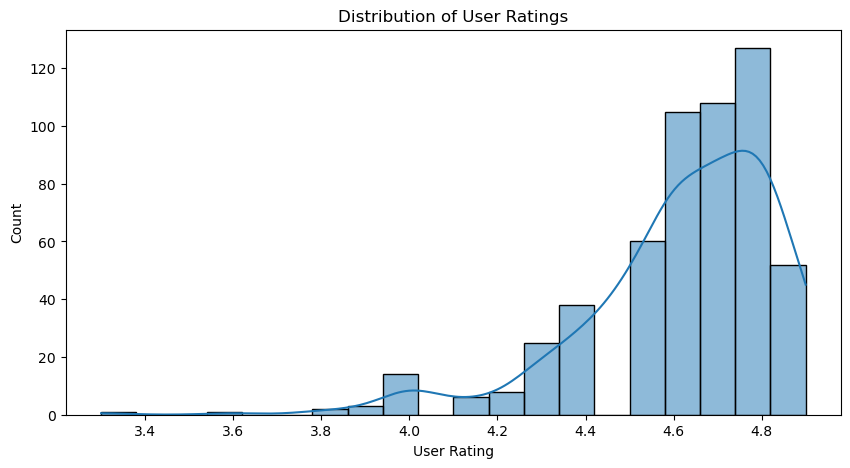

In [9]:
plt.figure(figsize=(10, 5))
sns.histplot(df['User Rating'], kde=True, bins=20)
plt.title('Distribution of User Ratings')
plt.show()

## Distribution of Price

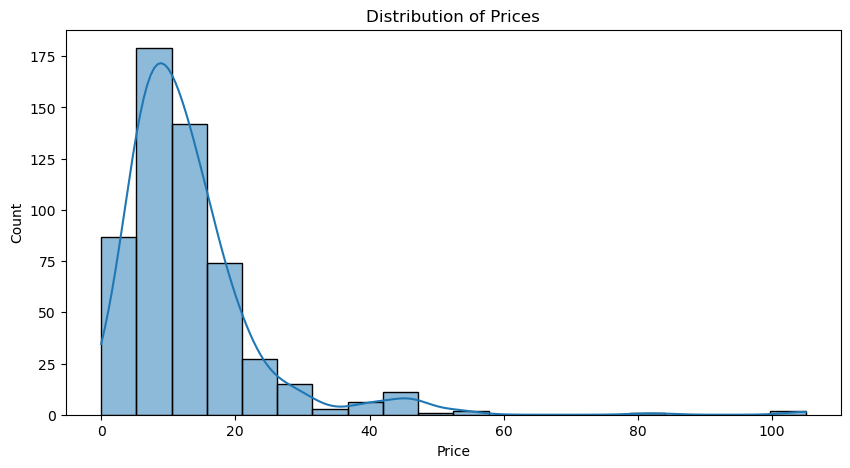

In [10]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Price'], kde=True, bins=20)
plt.title('Distribution of Prices')
plt.show()

## Distribution of User Reviews

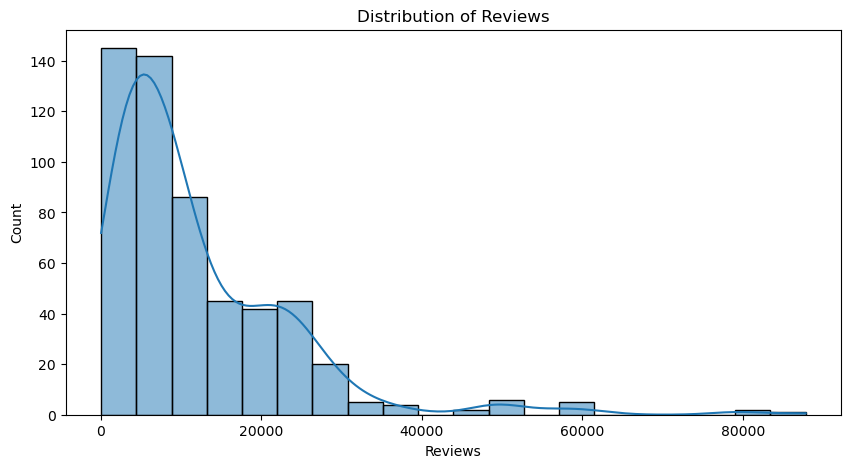

In [11]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Reviews'], kde=True, bins=20)
plt.title('Distribution of Reviews')
plt.show()

## Boxplot of User Rating by Genre

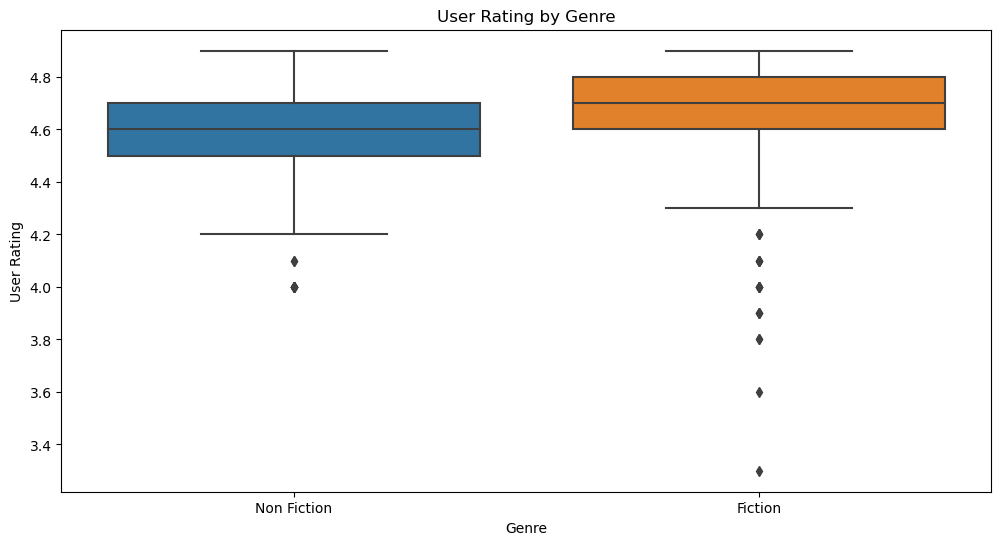

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Genre', y='User Rating', data=df)
plt.title('User Rating by Genre')
plt.show()

## Group by Genre and Year to analyze trends

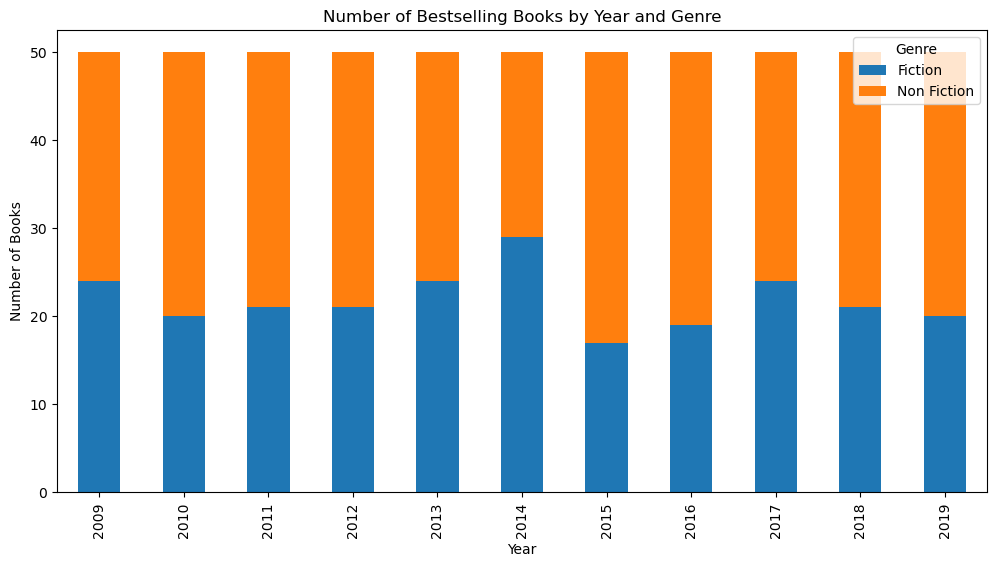

In [17]:
genre_year_group = df.groupby(['Year', 'Genre']).size().unstack().fillna(0)
genre_year_group.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Number of Bestselling Books by Year and Genre')
plt.xlabel('Year')
plt.ylabel('Number of Books')
plt.show()

## Scatter plot for Reviews vs. User Rating

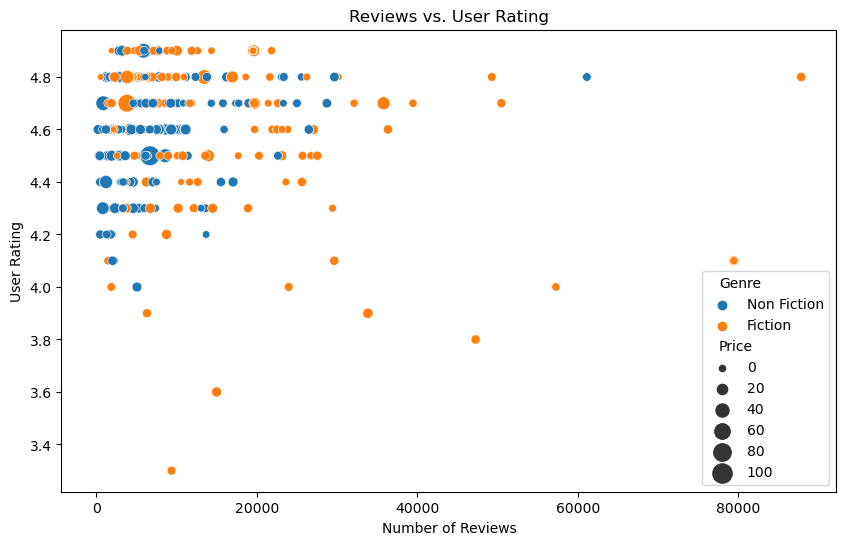

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Reviews', y='User Rating', hue='Genre', size='Price', sizes=(20, 200))
plt.title('Reviews vs. User Rating')
plt.xlabel('Number of Reviews')
plt.ylabel('User Rating')
plt.show()

# Regression Analysis Model
## We'll predict User Rating based on Reviews, Price, Year, and Genre

In [23]:
df['Genre'] = df['Genre'].map({'Fiction': 1, 'Non Fiction': 0})

In [24]:
X = df[['Reviews', 'Price', 'Year', 'Genre']]
y = df['User Rating']

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [28]:
y_pred = model.predict(X_test)

## Evaluate the model

In [29]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae:.2f}')
print(f'R² Score: {r2:.2f}')

Mean Absolute Error: 0.16
R² Score: 0.08


## Coefficients interpretation

In [30]:
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

         Coefficient
Reviews    -0.000002
Price      -0.001652
Year        0.018895
Genre       0.067260


## Actual vs Predicted Outputs

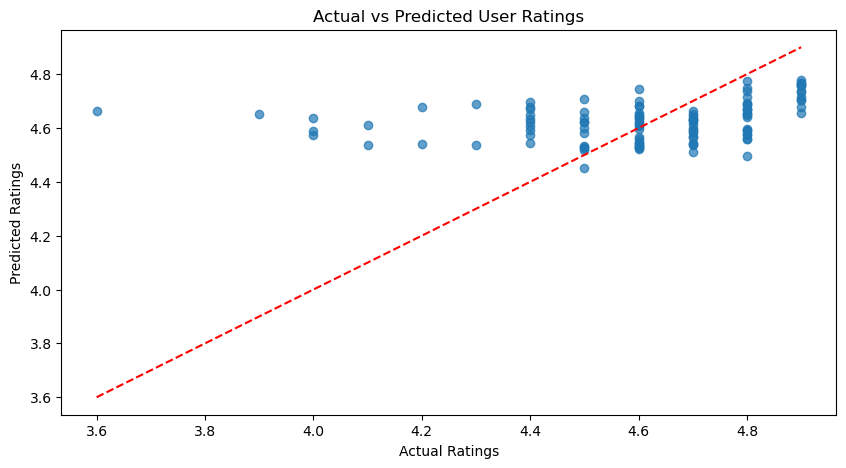

In [31]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.title('Actual vs Predicted User Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.show()

## Summary and Insights:
### 1. User Ratings have a positive correlation with the number of reviews.
### 2. Fiction books tend to have higher user ratings than Non-Fiction.
### 3. The year of publication has a minor impact on user ratings, indicating that recent books are as popular as older ones.
### 4. The price of the book does not significantly affect user ratings.